In [1]:
!pip install tweepy
!pip install pandas
!pip install matplotlib
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

  Using cached matplotlib-3.3.0-cp37-cp37m-win_amd64.whl (8.8 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached Pillow-7.2.0-cp37-cp37m-win_amd64.whl (2.1 MB)
  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)


In [2]:
access_token="2945289565-wRN9KXAVXe1B79dHB8Hlr2gtObWSi0shPh2bQ3L"
access_token_secret="n4qoueWhjt8bpcstB9GnzyL4kB3mA31xi3FhFtWfx4ug9"
consumer_key="29LdhaAyfobKT0J2T3rFUEvFk"
consumer_secret="h82EHiAGzVlZJ7goHnJWuG6LG2m6GeormqacrADqDtuefCp5xs"


In [3]:
#Basic Listener to print incoming tweets
class StdOutListener(StreamListener):
    def on_data(self,data):
        print(data)
        return True
    
    def on_error(self,status):
        print(status)
        

In [4]:
#Handles Twitter Auth and Connection to Twitter A/C
print(StreamListener)
l = StdOutListener()
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
stream = Stream(auth,l)
api = tweepy.API(auth)
#This Filters Streams to capture data by Keyword
#stream.filter(track = ['python','javascript','ruby'])


<class 'tweepy.streaming.StreamListener'>


In [5]:
user = api.me()
#print(user)
print('Name: ' + user.name)
print("Location: " + user.location)
print('Friends: ' + str(user.friends_count))

Name: Jitendra Purohit
Location: Mumbai, India
Friends: 202


In [6]:
tweets = api.user_timeline(screen_name = 'realDonaldTrump' , count = 20,tweet_mode="extended")
#print(tweets)
datet = []

for tweet in tweets:
    #print(tweet.created_at)
    datet.append(tweet.created_at)
#print(datet)
tmp = []

tweets_for_csv = [tweet.full_text for tweet in tweets]
for j in tweets_for_csv:
    tmp.append(j)


In [7]:
len(tmp)

20

In [8]:
from country_list import countries
#print(countries)

In [9]:
def fetch_tweets(id,count = 200):
    tmp = []
    for tweet in tweepy.Cursor(api.user_timeline, id, tweet_mode = "extended").items(count):
        tmp.append(tweet.full_text)
    return tmp


In [10]:
def read_sent_CSV(filename,delimiter = " "):
    df = pd.read_csv(filename)
    full_data = df.values.tolist()
    return full_data

In [11]:
def review_sent(tweets,neg_sents,pos_sents):
    ref_countries = {}
    sent_review = {}
    for country in countries:
        sent_c  = 0
        for tweet in tweets:
            if country['name'] in tweet:
                for sent in neg_sents:
                    if sent[0] in tweet:
                        sent_c -=1
                for sent in pos_sents:
                    if sent[0] in tweet:
                        sent_c +=1
                if country['name'] not in sent_review:
                    sent_review[country['name']] = 0
                if country['name'] not in ref_countries:
                    ref_countries[country['name']] = 0
                ref_countries[country['name']]+= 1
                sent_review[country['name']] = sent_c
    return ref_countries,sent_review

In [12]:
neg_sents = read_sent_CSV('negative_sent.csv')
#print(neg_sents)
pos_sents = read_sent_CSV('positive_sent.csv')

In [13]:
delegates = ['narendramodi' , 'realDonaldTrump', 'POTUS44']
sent_analysis = {}
for delegate in delegates:
    tweets = fetch_tweets(delegate,200)
    ref_countries , sent_review = review_sent(tweets,neg_sents,pos_sents)
    sent_analysis[delegate] = sent_review
print(ref_countries)
print(sent_review)

{'Canada': 1, 'Colombia': 1, 'Cuba': 5, 'India': 1, 'Liberia': 1, 'Mali': 1, 'Mexico': 1, 'Syria': 2, 'Laos': 1}
{'Canada': 2, 'Colombia': -1, 'Cuba': -2, 'India': 0, 'Liberia': 3, 'Mali': 0, 'Mexico': 1, 'Syria': -3, 'Laos': -2}


In [14]:
delegate_countries = {'narendramodi':'India' ,'realDonaldTrump': 'United States' , 'POTUS44':'United States'}

print(sent_analysis)


{'narendramodi': {'Bhutan': 6, 'France': -1, 'India': 57, 'Pakistan': -7, 'Russia': 3, 'Singapore': 7, 'Kazakhstan': 5, 'Sri Lanka': 4}, 'realDonaldTrump': {'Canada': -1, 'Germany': 0, 'Russia': -3, 'United States': -3}, 'POTUS44': {'Canada': 2, 'Colombia': -1, 'Cuba': -2, 'India': 0, 'Liberia': 3, 'Mali': 0, 'Mexico': 1, 'Syria': -3, 'Laos': -2}}


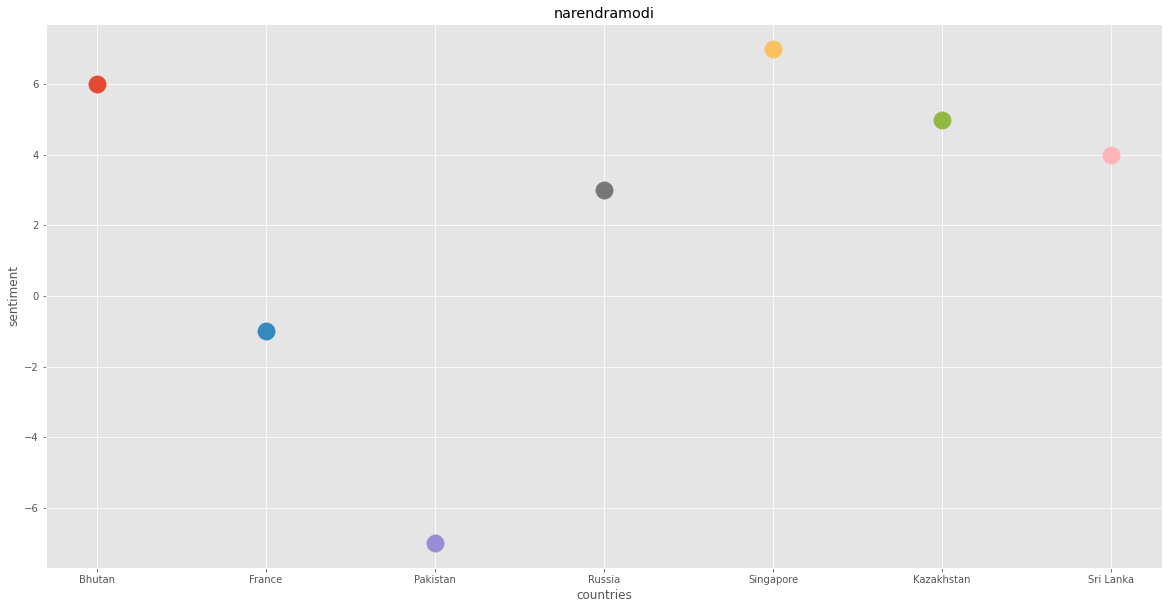

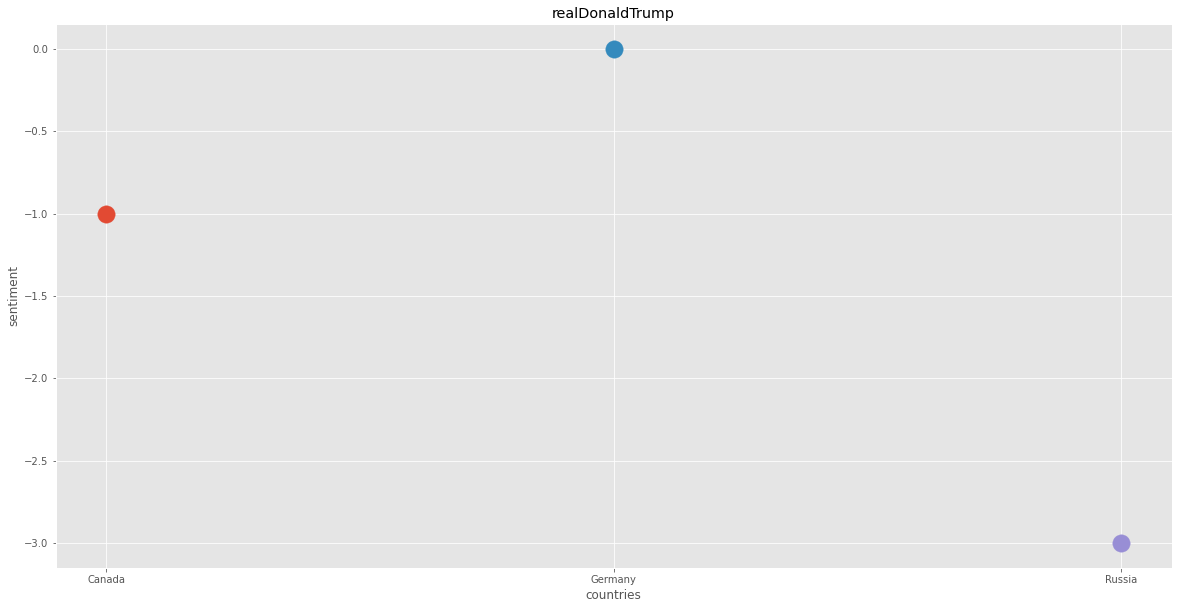

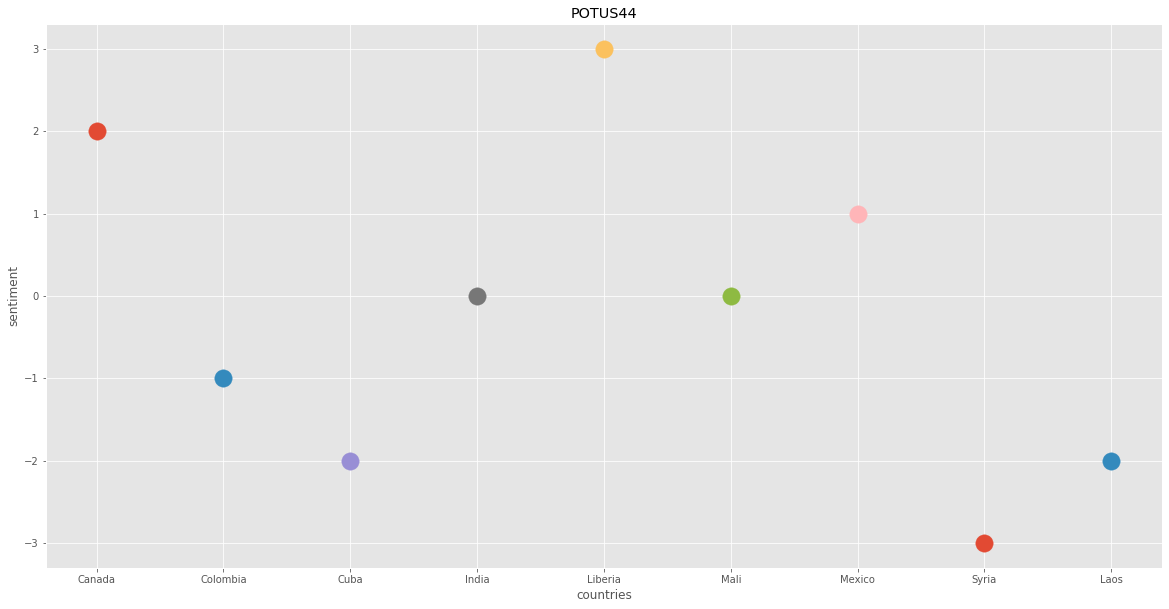

In [15]:
for delegate in delegates:
    plt.title(delegate)
    plt.xlabel('countries')
    plt.ylabel('sentiment')
    for country in sent_analysis[delegate]:
        if country != delegate_countries[delegate]:
            plt.scatter(country,sent_analysis[delegate][country],s=300)
    fig = plt.gcf()
    fig.set_size_inches(20,10)
    plt.show()